# Audio interface example

Workbench comes with a wrapper for audio devices to use them as programmable signal sources. It also comes with a SCPI server that implements a basic command set comparable to a lab signal generator to make it easier to operate. To use the SCPI protocol, you need to run the server in the background. This notebook requires the server to be running. The MOTU UltraLite mk5 instrument module has an entry point that allows you to start it from the command line.

    python workbench/instruments/motu_ultralite_mk5.py

## Sine wave

A basic sine wave. I'm using the math function to show it because the output is differential.

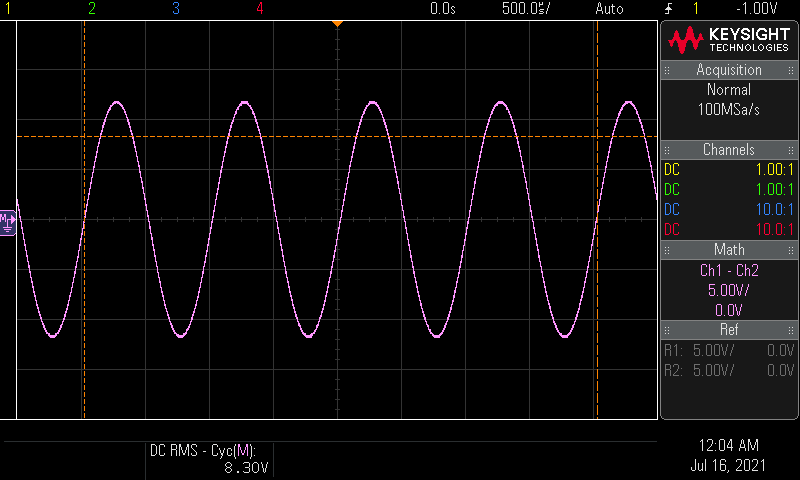

In [32]:
from workbench.instruments.motu_ultralite_mk5 import MOTOUltraLiteMk5
from workbench.instruments.keysight_dsox1204g import KeysightDSOX1204G

with (MOTOUltraLiteMk5.connect("TCPIP::127.0.0.1::5025::SOCKET") as motu_ultralite_mk5,
      KeysightDSOX1204G.connect("TCPIP::172.16.1.20::hislip0::INSTR") as keysight_dsox1204g):
    motu_ultralite_mk5.write("*RST")
    motu_ultralite_mk5.write("OUTPut5 ON")
    motu_ultralite_mk5.write("SOURce5:FREQuency 1e3")
    motu_ultralite_mk5.write("SOURce5:VOLTage 0")
    display(keysight_dsox1204g.screenshot())

# Square wave

There is no bandwidth limit applied to this signal, and the rise time of the interface is very limited.

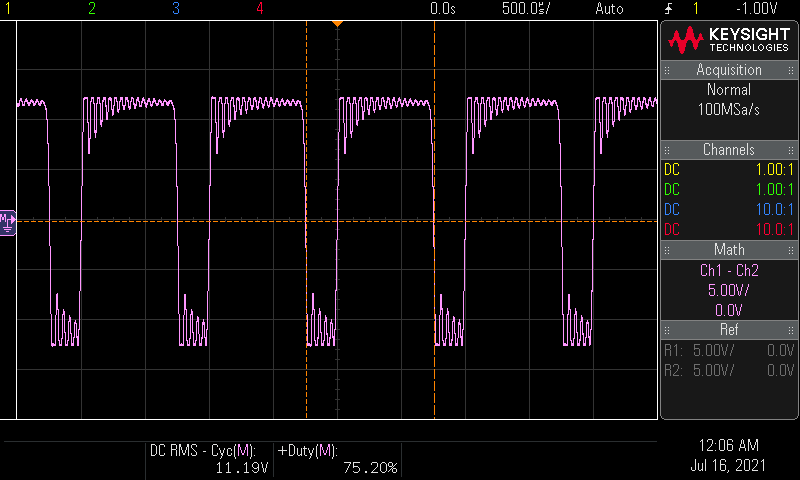

In [40]:
with (MOTOUltraLiteMk5.connect("TCPIP::127.0.0.1::5025::SOCKET") as motu_ultralite_mk5,
      KeysightDSOX1204G.connect("TCPIP::172.16.1.20::hislip0::INSTR") as keysight_dsox1204g):
    motu_ultralite_mk5.write("*RST")
    motu_ultralite_mk5.write("OUTPut5 ON")
    motu_ultralite_mk5.write("SOURce5:FUNCtion SQUare")
    motu_ultralite_mk5.write("SOURce5:FUNCtion:SQUare:DCYCle 75")
    display(keysight_dsox1204g.screenshot())

# Pulse

Same waveform as square wave but configured with pulse width instead of duty cycle.

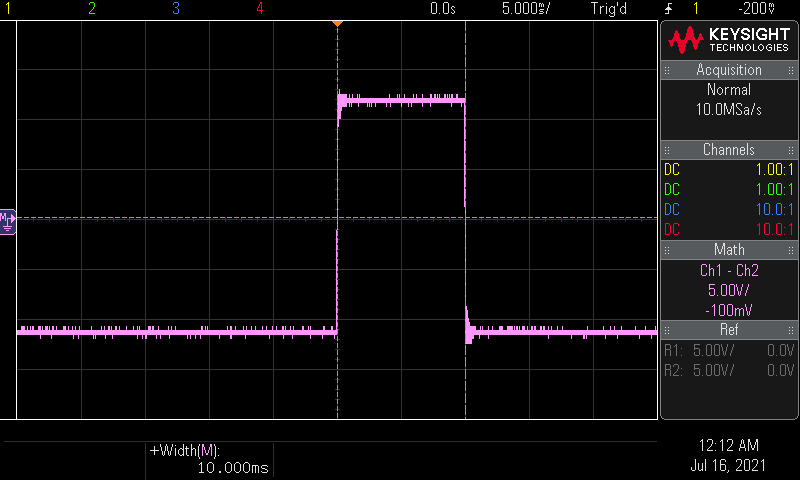

In [66]:
with (MOTOUltraLiteMk5.connect("TCPIP::127.0.0.1::5025::SOCKET") as motu_ultralite_mk5,
      KeysightDSOX1204G.connect("TCPIP::172.16.1.20::hislip0::INSTR") as keysight_dsox1204g):
    motu_ultralite_mk5.write("*RST")
    motu_ultralite_mk5.write("OUTPut5 ON")
    motu_ultralite_mk5.write("SOURce5:FUNCtion PULSE")
    motu_ultralite_mk5.write("SOURce5:PERIod 100e-3")
    motu_ultralite_mk5.write("SOURce5:FUNCtion:PULSE:PWIDth 10e-3")
    display(keysight_dsox1204g.screenshot())

# Ramp

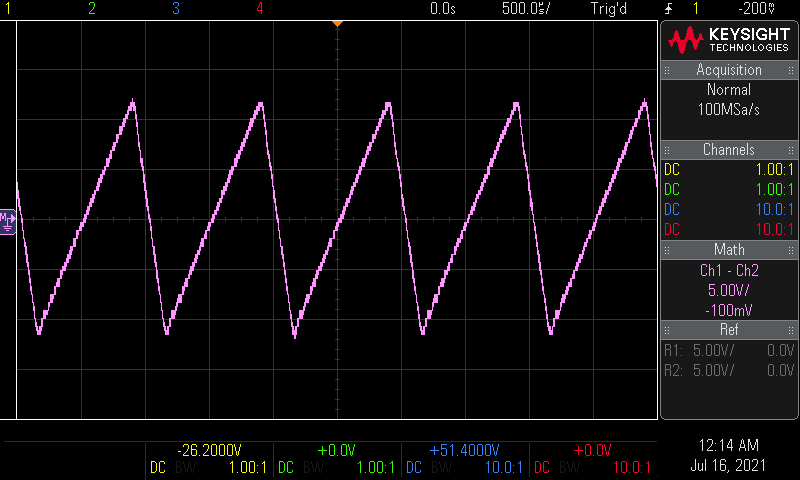

In [68]:
with (MOTOUltraLiteMk5.connect("TCPIP::127.0.0.1::5025::SOCKET") as motu_ultralite_mk5,
      KeysightDSOX1204G.connect("TCPIP::172.16.1.20::hislip0::INSTR") as keysight_dsox1204g):
    motu_ultralite_mk5.write("*RST")
    motu_ultralite_mk5.write("OUTPut5 ON")
    motu_ultralite_mk5.write("SOURce5:FUNCtion RAMP")
    motu_ultralite_mk5.write("SOURce5:FUNCtion:RAMP:SYMMetry 75")
    display(keysight_dsox1204g.screenshot())

# Noise

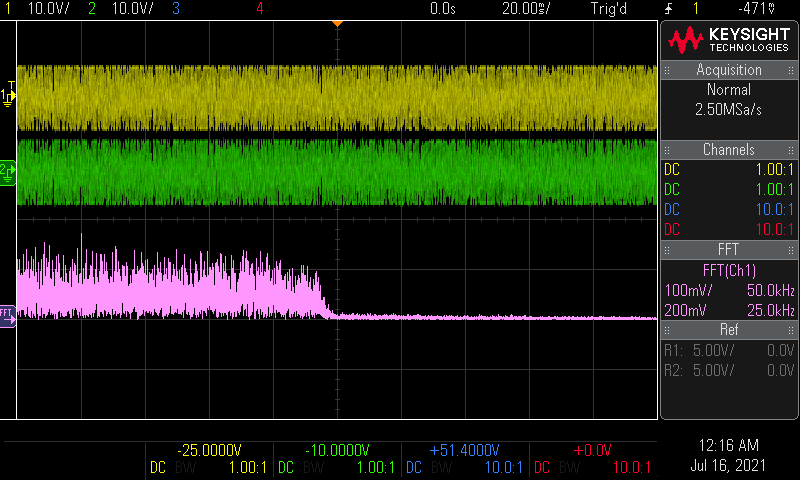

In [70]:
with (MOTOUltraLiteMk5.connect("TCPIP::127.0.0.1::5025::SOCKET") as motu_ultralite_mk5,
      KeysightDSOX1204G.connect("TCPIP::172.16.1.20::hislip0::INSTR") as keysight_dsox1204g):
    motu_ultralite_mk5.write("*RST")
    motu_ultralite_mk5.write("OUTPut5 ON")
    motu_ultralite_mk5.write("SOURce5:FUNCtion NOISE")
    display(keysight_dsox1204g.screenshot())

# Calibration

Because audio interfaces don't have a well-defined output voltage, the voltage is configured in dBFS by default. You can provide a calibration which unlocks RMS voltage, peak-to-peak voltage, and dBu. To calibrate a channel, set up a full-scale sine wave (using the default unit of dBFS and a value of 0 for the voltage) and measure the RMS voltage. In this example I take a nominal value from the user manual.

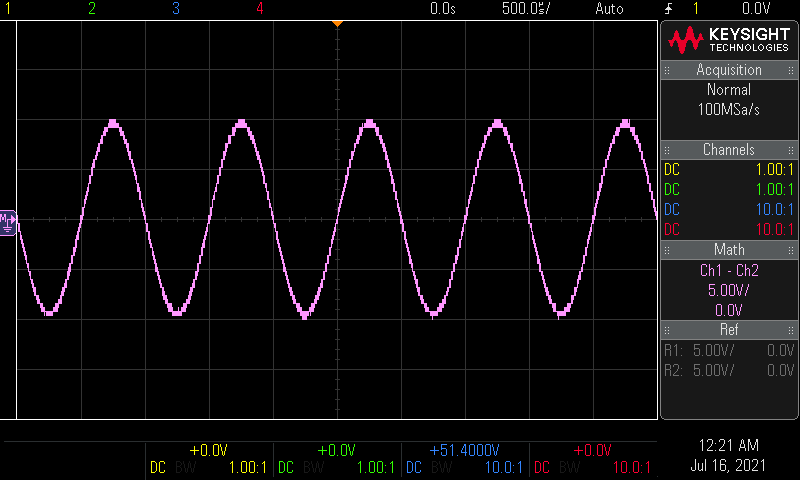

In [80]:
from workbench.utils import dbu_to_vrms
with (MOTOUltraLiteMk5.connect("TCPIP::127.0.0.1::5025::SOCKET") as motu_ultralite_mk5,
      KeysightDSOX1204G.connect("TCPIP::172.16.1.20::hislip0::INSTR") as keysight_dsox1204g):
    motu_ultralite_mk5.write("*RST")
    motu_ultralite_mk5.write("OUTPut5 ON")
    motu_ultralite_mk5.write("SOURce5:VOLTage:CALibration {:.3f}".format(dbu_to_vrms(+21)))
    motu_ultralite_mk5.write("SOURce5:VOLTage:UNIT VPP")
    motu_ultralite_mk5.write("SOURce5:VOLTage 20")
    display(keysight_dsox1204g.screenshot())


# DC

The DC waveform's level is set by the offset, not the voltage. Offset is always given in volts, and it always needs a calibration (including if used for other waveform types).

Note many audio interfaces have AC-coupled outputs and can't produce a DC signal.

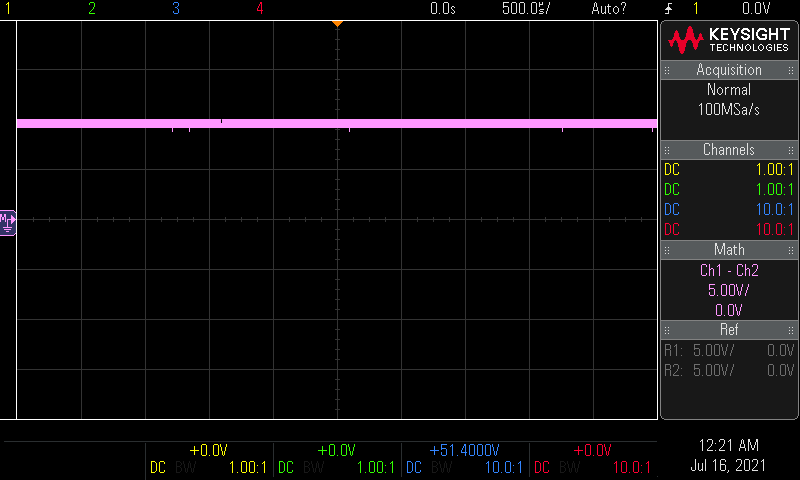

In [81]:
with (MOTOUltraLiteMk5.connect("TCPIP::127.0.0.1::5025::SOCKET") as motu_ultralite_mk5,
      KeysightDSOX1204G.connect("TCPIP::172.16.1.20::hislip0::INSTR") as keysight_dsox1204g):
    motu_ultralite_mk5.write("*RST")
    motu_ultralite_mk5.write("OUTPut5 ON")
    motu_ultralite_mk5.write("SOURce5:FUNCtion DC")
    motu_ultralite_mk5.write("SOURce5:VOLTage:CALibration {:.3f}".format(dbu_to_vrms(+21)))
    motu_ultralite_mk5.write("SOURce5:VOLTage:OFFSet 10")
    display(keysight_dsox1204g.screenshot())

# Sweep

In [84]:
with MOTOUltraLiteMk5.connect("TCPIP::127.0.0.1::5025::SOCKET") as motu_ultralite_mk5:
    motu_ultralite_mk5.write("*RST")
    motu_ultralite_mk5.write("OUTPut5 ON")
    motu_ultralite_mk5.write("SOURce5:FUNCtion SWEEP")
    motu_ultralite_mk5.write("SOURce5:FUNCtion:SWEEP:FREQuency:STARt 0.1")
    motu_ultralite_mk5.write("SOURce5:FUNCtion:SWEEP:FREQuency:STOP 10")
    motu_ultralite_mk5.write("SOURce5:FUNCtion:SWEEP:TIME 20")

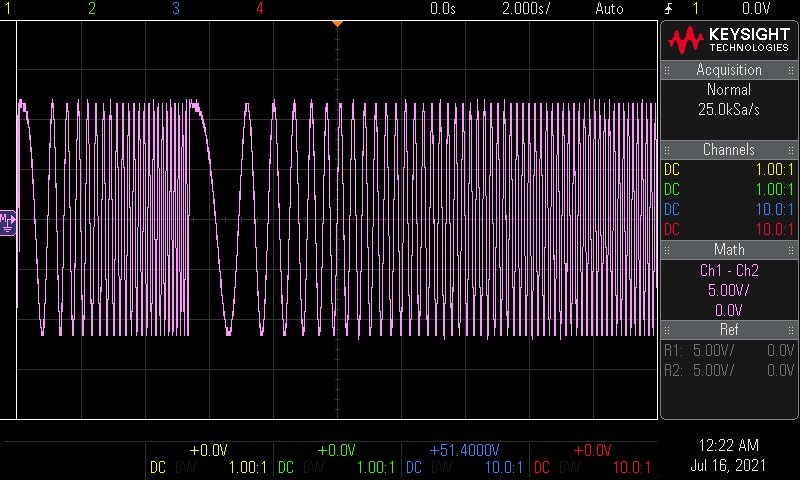

In [85]:
with KeysightDSOX1204G.connect("TCPIP::172.16.1.20::hislip0::INSTR") as keysight_dsox1204g:
    display(keysight_dsox1204g.screenshot())

# Impulse

The unit impulse waveshape is zero everywhere except at a single instant once per period, where it has the configured voltage. It theoretically contains all frequencies equally, which is why it is used to characterize a system's complete frequency and time response.

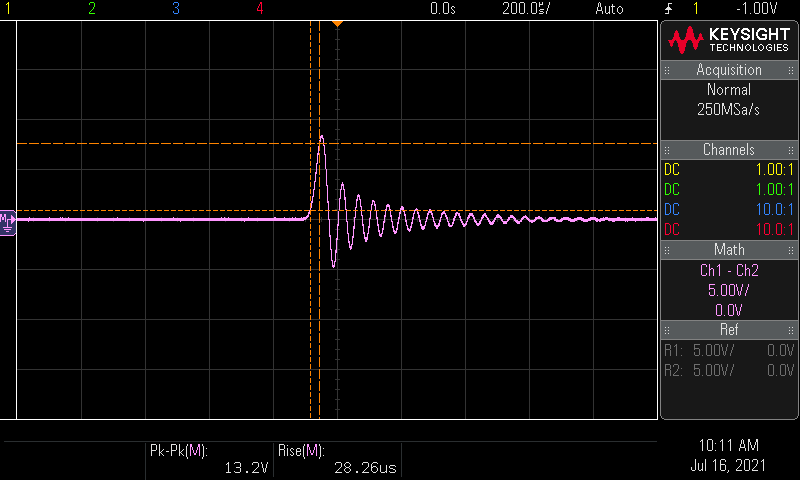

In [23]:
with (MOTOUltraLiteMk5.connect("TCPIP::127.0.0.1::5025::SOCKET") as motu_ultralite_mk5,
      KeysightDSOX1204G.connect("TCPIP::172.16.1.20::hislip0::INSTR") as keysight_dsox1204g):
    motu_ultralite_mk5.write("*RST")
    motu_ultralite_mk5.write("OUTPut5 ON")
    motu_ultralite_mk5.write("SOURce5:FUNCtion IMPulse")
    motu_ultralite_mk5.write("SOURce5:PERIod 2e-3")
    display(keysight_dsox1204g.screenshot())